<a href="https://colab.research.google.com/github/JNPauli/Emotional_Machines/blob/main/Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. This notebook is the continuation to the preprocessing.ipynb notebook.

1. Import all neccessary modules

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import gc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import X and y

In [3]:
import torchvision
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [4]:
os.chdir('/content/drive/MyDrive/Thesis')

In [5]:
y = np.load('train_con.npy')

In [6]:
y_ = y[0:10000]
y_frames = y[14276:]

In [7]:
y_all = np.concatenate((y_,y_frames))

NEW APPROACH:

Fit CNN on X

1. Read `n-rows`from X.

In [8]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [9]:
X = np.load('X_npy.npy')

In [10]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X,y_,test_size=0.2,random_state=42)

In [11]:
del X,y_
gc.collect()

0

In [12]:
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_,y_train_, test_size = 0.2,random_state=42)

In [13]:
X_frames = np.load('frames_npy.npy')

In [14]:
X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X_frames,y_frames,test_size=0.2,random_state=42)

In [15]:
del X_frames,y_frames
gc.collect()

11

In [16]:
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_train_f,y_train_f, test_size = 0.2,random_state=42)

Converting X to appropriate Datatype...

In [17]:
X_tensor_train = torch.from_numpy(X_train_)
del X_train_
gc.collect()
X_tensor_test = torch.from_numpy(X_test_)
del X_test_
gc.collect()
X_tensor_val = torch.from_numpy(X_val_)
del X_val_
gc.collect()

y_tensor_train = torch.from_numpy(y_train_)
del y_train_
gc.collect()
y_tensor_test = torch.from_numpy(y_test_)
del y_test_
gc.collect()
y_tensor_val = torch.from_numpy(y_val_)
del y_val_
gc.collect()

0

In [18]:
X_tensor_train = torch.tensor(X_tensor_train,dtype = torch.float32)
X_tensor_test = torch.tensor(X_tensor_test,dtype = torch.float32)
X_tensor_val = torch.tensor(X_tensor_val,dtype=torch.float32)

y_tensor_train = y_tensor_train.type(torch.LongTensor)
y_tensor_test = y_tensor_test.type(torch.LongTensor)
y_tensor_val = y_tensor_val.type(torch.LongTensor)

<ipython-input-18-3ff54277ee2f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_train = torch.tensor(X_tensor_train,dtype = torch.float32)
<ipython-input-18-3ff54277ee2f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_test = torch.tensor(X_tensor_test,dtype = torch.float32)
<ipython-input-18-3ff54277ee2f>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_val = torch.tensor(X_tensor_val,dtype=torch.float32)


In [19]:
X_tensor_train_ = torch.from_numpy(X_train_f)
del X_train_f
gc.collect()
X_tensor_test_ = torch.from_numpy(X_test_f)
del X_test_f
gc.collect()
X_tensor_val_ = torch.from_numpy(X_val_f)
del X_val_f
gc.collect()

y_tensor_train_ = torch.from_numpy(y_train_f)
del y_train_f
gc.collect()
y_tensor_test_ = torch.from_numpy(y_test_f)
del y_test_f
gc.collect()
y_tensor_val_ = torch.from_numpy(y_val_f)
del y_val_f
gc.collect()

0

In [20]:
X_tensor_train_ = torch.tensor(X_tensor_train_,dtype = torch.float32)
X_tensor_test_ = torch.tensor(X_tensor_test_,dtype = torch.float32)
X_tensor_val = torch.tensor(X_tensor_val_,dtype=torch.float32)

y_tensor_train_ = y_tensor_train_.type(torch.LongTensor)
y_tensor_test_ = y_tensor_test_.type(torch.LongTensor)
y_tensor_val = y_tensor_val_.type(torch.LongTensor)

<ipython-input-20-daeb6c2c99f4>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_train_ = torch.tensor(X_tensor_train_,dtype = torch.float32)
<ipython-input-20-daeb6c2c99f4>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_test_ = torch.tensor(X_tensor_test_,dtype = torch.float32)
<ipython-input-20-daeb6c2c99f4>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor_val = torch.tensor(X_tensor_val_,dtype=torch.float32)


In [21]:
X_tensor_train = torch.cat((X_tensor_train,X_tensor_train_),0)
X_tensor_test = torch.cat((X_tensor_test,X_tensor_test_),0)
X_tensor_val = torch.cat((X_tensor_val, X_tensor_val_),0)

y_tensor_train = torch.cat((y_tensor_train,y_tensor_train_),0)
y_tensor_test = torch.cat((y_tensor_test,y_tensor_test_),0)
y_tensor_val = torch.cat((y_tensor_val,y_tensor_val_),0)

In [22]:
X_tensor_train = X_tensor_train.expand(-1, 3, -1, -1)
X_tensor_test = X_tensor_test.expand(-1, 3, -1, -1)
X_tensor_val = X_tensor_val.expand(-1, 3, -1, -1)

In [23]:
print('training shape X is {}, validation shape is {}, test shape X is{}'.format(X_tensor_train.shape,X_tensor_val.shape,X_tensor_test.shape))

training shape X is torch.Size([11102, 3, 224, 224]), validation shape is torch.Size([2352, 3, 224, 224]), test shape X istorch.Size([3470, 3, 224, 224])


To get max value of classN-1

In [24]:
y_tensor_train = y_tensor_train-1
y_tensor_test = y_tensor_test-1
y_tensor_val = y_tensor_val-1

Setup custom dataset class

In [25]:
train_mean = (0.0505, 0.0505, 0.0505)
train_std = (0.0516, 0.0516, 0.0516)

In [26]:
test_mean = ([0.0510, 0.0510, 0.0510])
test_std = ([0.0520, 0.0520, 0.0520])

In [27]:
val_mean = ([0.0512, 0.0512, 0.0512])
val_std = ([0.0518, 0.0518, 0.0518])

In [28]:
class TrainDataset(Dataset):
    def __init__(self, X, y,transform=None):
        self.X = X
        self.y = y
        self.transform = transforms.Normalize((0.0505, 0.0505, 0.0505), (0.0516, 0.0516, 0.0516))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
          X = self.transform(X)

        return X, y

In [29]:
class TestDataset(Dataset):
    def __init__(self, X, y,transform=None):
        self.X = X
        self.y = y
        self.transform = transforms.Normalize(train_mean, train_std)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
          X = self.transform(X)

        return X, y

In [30]:
class ValDataset(Dataset):
    def __init__(self, X, y,transform=None):
        self.X = X
        self.y = y
        self.transform = transforms.Normalize(train_mean, train_std)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
          X = self.transform(X)

        return X, y

In [81]:
dataset_train = TrainDataset(X_tensor_train,y_tensor_train,transform=True)
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)

dataset_val = ValDataset(X_tensor_val,y_tensor_val,transform=True)
dataloader_val = DataLoader(dataset_val,batch_size=32)

dataset_test = TestDataset(X_tensor_test,y_tensor_test,transform=True)
dataloader_test = DataLoader(dataset_test, batch_size = 32)#,shuffle=True)


Setting up the CNN.

In [32]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.batch = nn.BatchNorm2d(32)
        #self.conv2 = nn.Conv2d(32,64,3) #remove layer
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(394272, 128)
        #self.fc2 = nn.Linear(128,10)
        self.Arousal = nn.Linear(128,10) #3
        self.Valence = nn.Linear(128,10)
        self.Dominance = nn.Linear(128,10)
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch(x)
        x = F.relu(x)
        #x = self.conv2(x)
        #x = F.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        #x = self.fc2(x)
        Arousal = self.Arousal(x)
        Valence = self.Valence(x)
        Dominance = self.Dominance(x)
        return Arousal, Valence, Dominance
#removed

In [33]:
SalienceNet = CNN()
#SalienceNet.to(device)

In [34]:
criterion = nn.CrossEntropyLoss()

In [35]:
pip install torcheval

In [36]:
from torcheval.metrics.functional import multiclass_f1_score

In [37]:
F1 = multiclass_f1_score

In [80]:
from tqdm import tqdm
def train(net, loss_fn, dataloader_train,dataloader_val,
          epoch=10, learning_rate=0.0001):
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)#torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=1e-4) # weight decay as a regularization technique to defy overfitting
    for param in model_CNN.parameters():
        param.requires_grad = False
    for param in model_CNN.Arousal.parameters():
      param.requires_grad = True
    for param in model_CNN.Valence.parameters():
      param.requires_grad = True
    for param in model_CNN.Dominance.parameters():
      param.requires_grad = True
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []

    f1_accuracy_train=[]
    f1_accuracy_val=[]

    train_epoch_loss = []
    val_epoch_loss = []
    for i in range(epoch):
        train_loop = tqdm(dataloader_train)
        val_loop = tqdm(dataloader_val)
        total = 0
        correct_a,correct_v,correct_d=0,0,0
        correct_a_f1,correct_v_f1,correct_d_f1=0,0,0
        val_a_f1,val_v_f1,val_d_f1=0,0,0

        net.to(device)
        net.train()
        for data, label in train_loop:
            data, label = data.to(device), label.to(device)
            #make prediction
            Arousal,Valence,Dominance = net(data.float())

            _a, y_pred_train_arousal = torch.max(Arousal,1)
            _v, y_pred_train_valence = torch.max(Valence,1)
            _d, y_pred_train_dominance = torch.max(Dominance,1)

            total += label[:,0].size(0)+label[:,1].size(0)+label[:,2].size(0)

            correct_a += (y_pred_train_arousal == label[:,0]).sum().item()
            correct_v += (y_pred_train_valence == label[:,1]).sum().item()
            correct_d += (y_pred_train_dominance == label[:,2]).sum().item()

            correct_a_f1 += F1(y_pred_train_arousal, label[:,0],average='weighted',num_classes=10)
            correct_v_f1 += F1(y_pred_train_valence, label[:,1],average='weighted',num_classes=10)
            correct_d_f1 += F1(y_pred_train_dominance, label[:,2],average='weighted',num_classes=10)

            sum_f1 = ((correct_a_f1/len(dataloader_train))+(correct_d_f1/len(dataloader_train))+(correct_v_f1/len(dataloader_train)))

            sum_correct = (correct_a+correct_v+correct_d)
            # Zero out the gradients
            optimizer.zero_grad()

            # Calculate loss.
            #loss = loss_fn(output,label)#torch.max(label.long(), 1)[0])
            loss_arousal = loss_fn(Arousal,label[:,0])
            loss_valence = loss_fn(Valence,label[:,1])
            loss_dominance = loss_fn(Dominance,label[:,2])
            loss=loss_arousal+loss_valence+loss_dominance


            # Backpropagation and gradient update.
            loss.backward()# Calculate gradients. #retrain_graph=True

            optimizer.step() # Apply gradient update

            train_loss.append(loss.item())
            train_loop.set_description(f"Epoch [{i+1}/{epoch}]")

        train_accuracy.append(sum_correct/total)
        f1_accuracy_train.append(sum_f1)
        train_epoch_loss.append((np.array(train_loss).mean()))

        #validation
        net.eval()
        val_total = 0
        val_arousal,val_valence, val_dominance = 0,0,0
        for data, labels in dataloader_val:
            data, labels = data.to(device), labels.to(device)

            Arousal_v,Valence_v,Dominance_v = net(data.float())

            _a, y_pred_val_arousal = torch.max(Arousal_v,1)
            _v, y_pred_val_valence = torch.max(Valence_v,1)
            _d, y_pred_val_dominance = torch.max(Dominance_v,1)

            val_total += labels[:,0].size(0)+labels[:,1].size(0)+labels[:,2].size(0)

            val_arousal += (y_pred_val_arousal == labels[:,0]).sum().item()
            val_valence += (y_pred_val_valence == labels[:,1]).sum().item()
            val_dominance += (y_pred_val_dominance == labels[:,2]).sum().item()

            val_a_f1 += F1(y_pred_val_arousal, labels[:,0],average='weighted',num_classes=10)
            val_v_f1 += F1(y_pred_val_valence, labels[:,1],average='weighted',num_classes=10)
            val_d_f1 += F1(y_pred_val_dominance, labels[:,2],average='weighted',num_classes=10)

            sum_correct_val = (val_arousal+val_valence+val_dominance)


            sum_val_f1 = ((val_a_f1/len(dataloader_val))+(val_d_f1/len(dataloader_val))+(val_v_f1/len(dataloader_val)))

            loss_arousal_v = loss_fn(Arousal_v,labels[:,0])
            loss_valence_v = loss_fn(Valence_v,labels[:,1])
            loss_dominance_v = loss_fn(Dominance_v,labels[:,2])

            val_l=loss_arousal_v+loss_valence_v+loss_dominance_v

            val_loss.append(val_l.item())

        val_epoch_loss.append((np.array(val_loss).mean()))

        val_accuracy.append(sum_correct_val/val_total)

        f1_accuracy_val.append(sum_val_f1)


    return train_loss,train_epoch_loss,val_loss,val_epoch_loss, train_accuracy,val_accuracy, f1_accuracy_train,f1_accuracy_val


In [89]:
def test(net,loss_fn,dataloader_test):
  net.eval()
  test_loss = []
  test_total = 0
  test_arousal,test_valence, test_dominance = 0,0,0

  test_acc = []
  test_loop = tqdm(dataloader_test)
  i=0
  for batch, (data, labels) in enumerate(test_loop):
      print('testing...')

      data, labels = data.to(device), labels.to(device)
      arousal,valence,dominance = net(data.float())

      __a, y_pred_test_arousal = torch.max(arousal,1)
      __v, y_pred_test_valence = torch.max(valence,1)
      __d, y_pred_test_dominance = torch.max(dominance,1)

      arousal_t = loss_fn(arousal,labels[:,0])
      valence_t = loss_fn(valence,labels[:,1])
      dominance_t = loss_fn(dominance,labels[:,2])

      test_l = arousal_t+valence_t+dominance_t

      test_loss.append(test_l.item())
      test_loop.set_description(f"Batch [{i+1}/{batch}]")
      i=+1

      test_total += labels[:,0].size(0)+labels[:,1].size(0)+labels[:,2].size(0)

      test_arousal += F1(y_pred_test_arousal,labels[:,0],num_classes=10,average='weighted')
      test_valence += F1(y_pred_test_valence,labels[:,1],num_classes=10,average='weighted')
      test_dominance += F1(y_pred_test_dominance,labels[:,2],num_classes=10,average='weighted')

      sum_correct_test = ((test_arousal/len(dataloader_test))+(test_valence/len(dataloader_test))+(test_dominance/len(dataloader_test)))
      #test_correct += (y_pred_test==torch.max(labels,1)[0]).sum().item()

      test_acc.append(sum_correct_test)
    #y_pred_test = torch.softmax(outputs,dim=1).argmax(dim=1)

   # print('test acc is {}'.format(test_acc)
  return test_loss, test_acc

In [40]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [41]:
import matplotlib.pyplot as plt

In [42]:
from IPython.display import Javascript

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

<IPython.core.display.Javascript object>

In [43]:
from torchvision import models

In [44]:
model = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
class CNN1(nn.Module):
    def __init__(self, pretrained):
        super(CNN1, self).__init__()
        if pretrained is True:
            self.model = models.__dict__["alexnet"](pretrained="imagenet")
        else:
            self.model = models.__dict__["alexnet"](pretrained=None)
        self.Arousal= nn.Linear(256, 10)
        self.Valence = nn.Linear(256,10)
        self.Dominance = nn.Linear(256, 10)

    def forward(self, x):
        bs, _, _, _ = x.shape
        x = self.model.features(x)
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        Arousal = self.Arousal(x)
        Valence = self.Valence(x)
        Dominance = self.Dominance(x)
        return Arousal, Valence, Dominance
        return {'label1': label1, 'label2': label2, 'label3': label3}

In [46]:
model_CNN = CNN1(True).to(device)

In [47]:
for param in model_CNN.parameters():
        param.requires_grad = False
for param in model_CNN.Arousal.parameters():
  param.requires_grad = True
for param in model_CNN.Valence.parameters():
  param.requires_grad = True
for param in model_CNN.Dominance.parameters():
  param.requires_grad = True

In [82]:
np.random.seed(1)
torch.manual_seed(1)

train_loss,train_epoch_loss,val_loss,val_epoch_loss,train_acc,val_acc,f1_acc,f1_val=train(net=model_CNN,loss_fn=criterion,dataloader_train=dataloader_train,
                  dataloader_val=dataloader_val,epoch=10,learning_rate=0.00001)




Streaming output truncated to the last 5000 lines.
  0%|          | 0/347 [00:00<?, ?it/s]


  0%|          | 0/347 [00:00<?, ?it/s]



  0%|          | 0/347 [00:00<?, ?it/s]


  0%|          | 0/347 [00:00<?, ?it/s]



  0%|          | 0/74 [00:21<?, ?it/s]


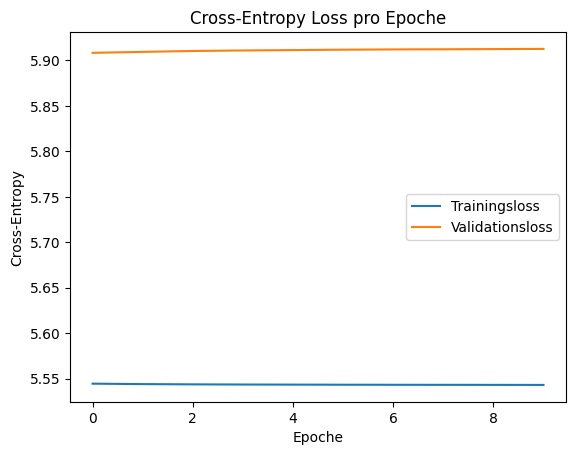

In [83]:
plt.plot(train_epoch_loss, label = 'Trainingsloss')
plt.plot(val_epoch_loss, label = 'Validationsloss')
plt.xlabel('Epoche')
plt.ylabel('Cross-Entropy')
plt.title('Cross-Entropy Loss pro Epoche')
plt.legend()
plt.show()

In [84]:
f1_acc,f1_val

([tensor(0.5581, device='cuda:0'),
  tensor(0.5598, device='cuda:0'),
  tensor(0.5592, device='cuda:0'),
  tensor(0.5597, device='cuda:0'),
  tensor(0.5576, device='cuda:0'),
  tensor(0.5590, device='cuda:0'),
  tensor(0.5578, device='cuda:0'),
  tensor(0.5593, device='cuda:0'),
  tensor(0.5605, device='cuda:0'),
  tensor(0.5557, device='cuda:0')],
 [tensor(0.3470, device='cuda:0'),
  tensor(0.3436, device='cuda:0'),
  tensor(0.3423, device='cuda:0'),
  tensor(0.3469, device='cuda:0'),
  tensor(0.3425, device='cuda:0'),
  tensor(0.3428, device='cuda:0'),
  tensor(0.3456, device='cuda:0'),
  tensor(0.3469, device='cuda:0'),
  tensor(0.3433, device='cuda:0'),
  tensor(0.3424, device='cuda:0')])

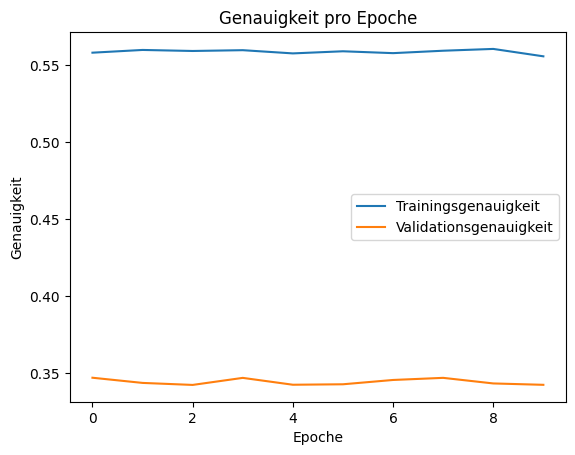

In [85]:
plt.plot(torch.tensor(f1_acc,device='cpu'), label = 'Trainingsgenauigkeit')
plt.plot(torch.tensor(f1_val,device='cpu'), label = 'Validationsgenauigkeit')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit pro Epoche')
plt.legend()
plt.show()

In [90]:
test_loss,test_acc = test(net=model_CNN,loss_fn=criterion,dataloader_test=dataloader_test)

Batch [2/4]:   3%|▎         | 3/109 [00:00<00:04, 24.29it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/9]:   8%|▊         | 9/109 [00:00<00:04, 24.32it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/14]:  14%|█▍        | 15/109 [00:00<00:03, 24.69it/s]

testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/20]:  19%|█▉        | 21/109 [00:00<00:03, 25.49it/s]

testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/26]:  25%|██▍       | 27/109 [00:01<00:03, 25.29it/s]

testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/32]:  30%|███       | 33/109 [00:01<00:03, 25.24it/s]

testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/38]:  36%|███▌      | 39/109 [00:01<00:02, 24.90it/s]

testing...
testing...
testing...
testing...
testing...


Batch [2/43]:  39%|███▊      | 42/109 [00:01<00:02, 24.99it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/49]:  44%|████▍     | 48/109 [00:01<00:02, 24.81it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/55]:  50%|████▉     | 54/109 [00:02<00:02, 25.45it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/61]:  55%|█████▌    | 60/109 [00:02<00:01, 24.97it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/66]:  61%|██████    | 66/109 [00:02<00:01, 24.06it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/71]:  66%|██████▌   | 72/109 [00:02<00:01, 23.99it/s]

testing...
testing...
testing...
testing...
testing...


Batch [2/76]:  69%|██████▉   | 75/109 [00:03<00:01, 24.20it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/82]:  74%|███████▍  | 81/109 [00:03<00:01, 23.92it/s]

testing...
testing...
testing...
testing...
testing...


Batch [2/87]:  80%|███████▉  | 87/109 [00:03<00:00, 23.16it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/92]:  83%|████████▎ | 90/109 [00:03<00:00, 22.61it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/97]:  88%|████████▊ | 96/109 [00:03<00:00, 23.83it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...
testing...


Batch [2/103]:  94%|█████████▎| 102/109 [00:04<00:00, 24.17it/s]WARNING:root:Warning: Some classes do not exist in the target. F1 scores for these classes will be cast to zeros.


testing...
testing...
testing...
testing...
testing...


Batch [2/108]: 100%|██████████| 109/109 [00:04<00:00, 24.46it/s]

testing...
testing...
testing...
testing...
testing...


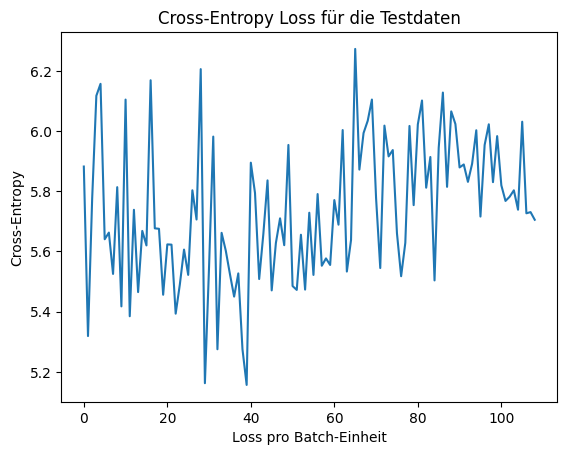

In [91]:
plt.plot(test_loss)
plt.xlabel('Loss pro Batch-Einheit')
plt.ylabel('Cross-Entropy')
plt.title('Cross-Entropy Loss für die Testdaten')
plt.show()

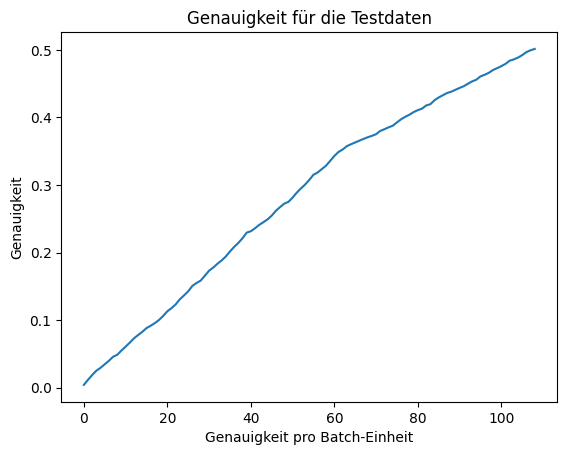

In [93]:
plt.plot(torch.tensor(test_acc,device='cpu'))
plt.xlabel('Genauigkeit pro Batch-Einheit')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit für die Testdaten')
plt.show()

In [ ]:
np.mean(test_acc), np.std(test_acc)

In [ ]:
np.mean(train_acc), np.mean(val_acc), np.std(train_acc),np.std(val_acc)